In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#Import Per Capita Personal Income in Miami-Fort Lauderdale-West Palm Beach, FL
income_soflo_path = Path("income_soflo.csv")
income_soflo_df = pd.read_csv(income_soflo_path)

#Rename the columns
income_soflo_df = income_soflo_df.rename(columns={'MIAM112PCPI_PCH': 'Percent Change'})
income_soflo_df = income_soflo_df.rename(columns={'DATE': 'Date'})
income_soflo_df

,Date,Percent Change
0,2016-01-01,0.59556
1,2017-01-01,7.70029
2,2018-01-01,6.82313
3,2019-01-01,6.27705
4,2020-01-01,4.23990
5,2021-01-01,10.88120


<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

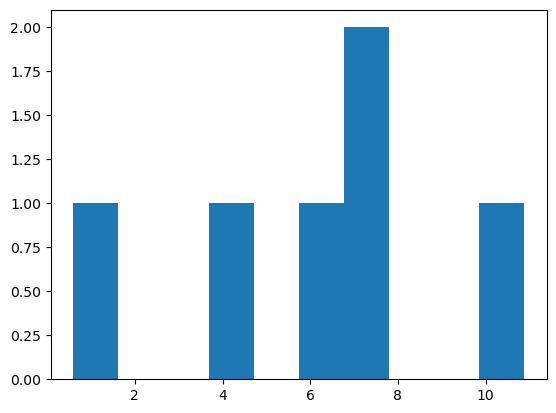

In [19]:
# Visiual Test to see if Normally Distributed
plt.hist(income_soflo_df['Percent Change'])
plt.hist


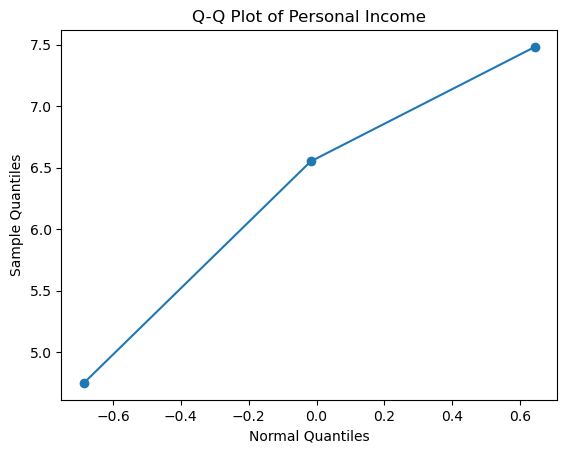

In [12]:
# Calculate the quantiles of the 'Percent Change' column
q = np.quantile(income_soflo_df['Percent Change'], [0.25, 0.5, 0.75])

# Calculate the quantiles of the normal distribution
q_norm = np.quantile(np.random.normal(loc=0, scale=1, size=10000), [0.25, 0.5, 0.75])

# Create a Q-Q plot
plt.plot(q_norm, q, 'o-')

# Set the title and axis labels
plt.title('Q-Q Plot of Personal Income')
plt.xlabel('Normal Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

In [15]:
#Import Consumer Price Index for All Urban Consumers:Rent of Primary Residence in Miami-Fort Lauderdale-West Palm Beach, FL
rent_soflo_path = Path("rent_soflo.csv")
rent_soflo_df = pd.read_csv(rent_soflo_path)
rent_soflo_df

#Rename the columns
rent_soflo_df = rent_soflo_df.rename(columns={'CUURA320SEHA_PCH': 'Percent Change'})
rent_soflo_df = rent_soflo_df.rename(columns={'DATE': 'Date'})
rent_soflo_df

,Date,Percent Change
0,2016-01-01,4.91979
1,2017-01-01,4.67466
2,2018-01-01,3.34017
3,2019-01-01,4.15718
4,2020-01-01,1.63436
5,2021-01-01,2.42243


<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

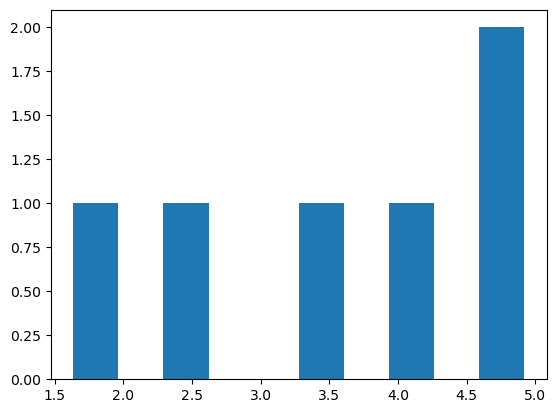

In [16]:
# Visiual Test to see if Normally Distributed
plt.hist(rent_soflo_df['Percent Change'])
plt.hist

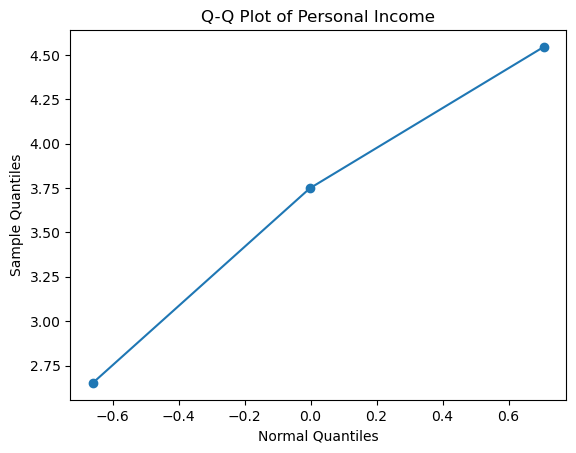

In [17]:
# Calculate the quantiles of the 'Percent Change' column
q = np.quantile(rent_soflo_df['Percent Change'], [0.25, 0.5, 0.75])

# Calculate the quantiles of the normal distribution
q_norm = np.quantile(np.random.normal(loc=0, scale=1, size=10000), [0.25, 0.5, 0.75])

# Create a Q-Q plot
plt.plot(q_norm, q, 'o-')

# Set the title and axis labels
plt.title('Q-Q Plot of Personal Income')
plt.xlabel('Normal Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

In [43]:
mergedsoflo_df = rent_soflo_df.merge(income_soflo_df, on='Date', suffixes=(' Rent', ' Income'))

mergedsoflo_df.head()

,Date,Percent Change Rent,Percent Change Income
0,2016-01-01,4.91979,0.59556
1,2017-01-01,4.67466,7.70029
2,2018-01-01,3.34017,6.82313
3,2019-01-01,4.15718,6.27705
4,2020-01-01,1.63436,4.23990


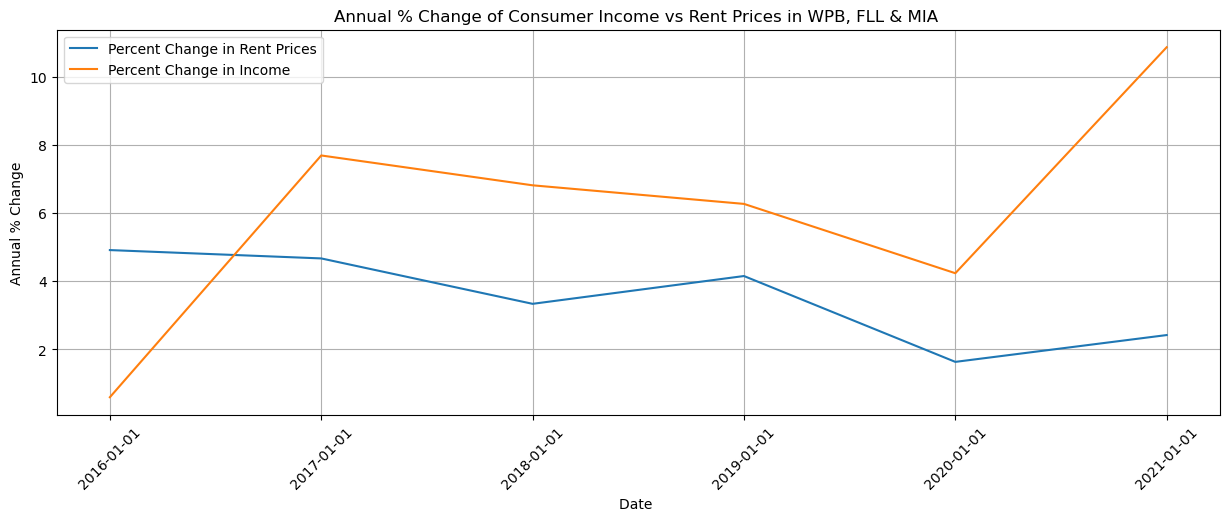

In [36]:
# Extract the x- and y-axes for each DataFrame
mergedsoflo_x = mergedsoflo_df["Date"]
mergedsoflo_y = rent_soflo_df["Percent Change"]
mergedsoflo_y1 = income_soflo_df["Percent Change"]

# Create the line chart
plt.figure(figsize=(15, 5))
plt.plot(mergedsoflo_x, mergedsoflo_y, label=("Percent Change in Rent Prices"))
plt.plot(mergedsoflo_x, mergedsoflo_y1, label=("Percent Change in Income "))


# Add a title, labels, and grid lines
plt.title("Annual % Change of Consumer Income vs Rent Prices in WPB, FLL & MIA ")
plt.ylabel("Annual % Change")
plt.xlabel("Date ")
plt.xticks(rotation=45)
#plt.ylim(280,450)
plt.grid(True)

# Add a legend and show the plot
plt.legend()
plt.show()

In [31]:
# Perform the t-test
from scipy import stats
t_test_results = stats.ttest_ind(rent_soflo_df['Percent Change'], income_soflo_df['Percent Change'], equal_var=True)

# Print the t-test results
print(t_test_results)

Ttest_indResult(statistic=-1.6985318992684357, pvalue=0.12025243809935424)


In [33]:
#The t-statistic is -1.6985318992684357. This is a negative value, which means that the mean of the first sample (rent_change) is less than the mean of the second sample (income_change).
#The p-value is 0.12025243809935424. This is greater than the significance level of 0.05, which means that we fail to reject the null hypothesis that there is no difference in the mean percent change of rent prices and income in West Palm Beach, Fort Lauderdale, and Miami between 2016 and 2021.
#In other words, there is not enough evidence to conclude that there is a statistically significant difference in the mean percent change of rent prices and income. 
#However, the p-value is close to the significance level of 0.05, so we may want to consider repeating the study with a larger sample size to see if we can get a more definitive answer.

In [42]:
# Print Summary Statistics
rent_summary = rent_soflo_df.describe()
income_summary = income_soflo_df.describe()
print("Summary statistics for rent data:")
print(rent_summary)

print("Summary statistics for income data:")
print(income_summary)

Summary statistics for rent data:
       Percent Change
count        6.000000
mean         3.524765
std          1.303162
min          1.634360
25%          2.651865
50%          3.748675
75%          4.545290
max          4.919790
Summary statistics for income data:
       Percent Change
count        6.000000
mean         6.086188
std          3.456378
min          0.595560
25%          4.749187
50%          6.550090
75%          7.481000
max         10.881200
